<a href="https://colab.research.google.com/github/Mintass/INFO213/blob/main/INFO213_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drexel University
## College of Computing and Informatics
## INFO 213: Data Science Programming II
## Assignment 3
## Due Date: Sunday, May 18, 2025
## This assignment counts for 15% of the final grade


# YOUR NAME: Hanjun Xu

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Question 1: Implement Principle Component Analysis (PCA) for Data Visualization and Classification

- In this question, you will implement the Principle Component Analysis (PCA) algorithm for dimensionality reduction on a digits dataset. The dataset contains 1,797 images of size 8x8 pixels. Each image is one of 10 digits in [0-9]. You can load the data from Scikit Learn's datasets using `load_digits()`.
- You will transform each image from 64 (8x8) dimensions to 2 dimensions and visualize the clusters of the 1797 images on a 2-D plane.
- You will fit a logistic regression classifier and test the accuracy on the original and dimensionality reduced image data.

**The steps for PCA are summarized as below**:

 1. Standardize the $d$-dimensional dataset.
 2. Construct the covariance matrix.
 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
 4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
 5. Select $k$ eigenvectors, which correspond to the $k$ largest eigenvalues, where $k$ is the dimensionality of the new feature subspace ($k\leq d$).
 6. Construct a projection matrix, $\mathbf{W}$, from the “top” $k$ eigenvectors.
 7. Transform the $d$-dimensional input dataset, $\mathbf{X}$, using the projection matrix, $\mathbf{W}$, to obtain the new $k$-dimensional feature subspace.


Step 1: Load the digits dataset from Scikit-Learn datasets as a DataFrame using `load_digits()`. The dataframe should have the shape of (1797, 65). List the columns of the DataFrame.

In [249]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

df = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
df['target'] = y

print(f"DataFrame shape: {df.shape}")

print("First few columns:", df.columns[:5].tolist())
print("Last few columns:", df.columns[-5:].tolist())
print(f"Total number of columns: {len(df.columns)}")

DataFrame shape: (1797, 65)
First few columns: ['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4']
Last few columns: ['pixel_60', 'pixel_61', 'pixel_62', 'pixel_63', 'target']
Total number of columns: 65


Step 2: Extract the columns 0-63 as feature matrix $X$, and the column 64 as target vector $y$. Split the data into separate training and test set. Show the shape of each set.

In [250]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:64].values
y = df.iloc[:, 64].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X shape: (1797, 64)
y shape: (1797,)
X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


Step 3: Standardize the features into the same scale.

In [251]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Step 4: Construct the covariance matrix by using numpy's `np.cov()` function on the standardized training data.

In [252]:
cov_matrix = np.cov(X_train_std.T)

print(f"Covariance matrix shape: {cov_matrix.shape}")

print("\nTop-left 5x5 portion of the covariance matrix:")
print(cov_matrix[:5, :5])

print("\nFirst 5 diagonal elements (variances):")
print(np.diag(cov_matrix)[:5]) 

Covariance matrix shape: (64, 64)

Top-left 5x5 portion of the covariance matrix:
[[ 0.          0.          0.          0.          0.        ]
 [ 0.          1.00074294  0.58354939  0.21634605 -0.04104011]
 [ 0.          0.58354939  1.00074294  0.55179362 -0.10664756]
 [ 0.          0.21634605  0.55179362  1.00074294  0.01946374]
 [ 0.         -0.04104011 -0.10664756  0.01946374  1.00074294]]

First 5 diagonal elements (variances):
[0.         1.00074294 1.00074294 1.00074294 1.00074294]


Step 5: Decompose the covariance matrix into its eigenvectors and eigenvalues by using numpy's `np.linalg.eig()` function. Print out the eigenvalues.

In [253]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("First 10 eigenvalues:")
print(eigenvalues[:10])

print(f"\nShape of eigenvalues: {eigenvalues.shape}")
print(f"Shape of eigenvectors: {eigenvectors.shape}")

First 10 eigenvalues:
[7.39473869 5.9223188  5.25229279 3.90746836 2.97614572 2.64108436
 2.41403293 2.07472957 1.85134308 1.79411347]

Shape of eigenvalues: (64,)
Shape of eigenvectors: (64, 64)


Step 6: The variance explained ratio of an eigenvalue $\lambda_j$ is the fraction of the eigenvalue, $\lambda_j$, and the total sum of the eigenvalues:
$$
explained\_variance\_ratio =\frac{\lambda_j}{\sum_{j=1}^{d} \lambda_j}
$$

Plot the variance explained ratios of all the eigenvalues.

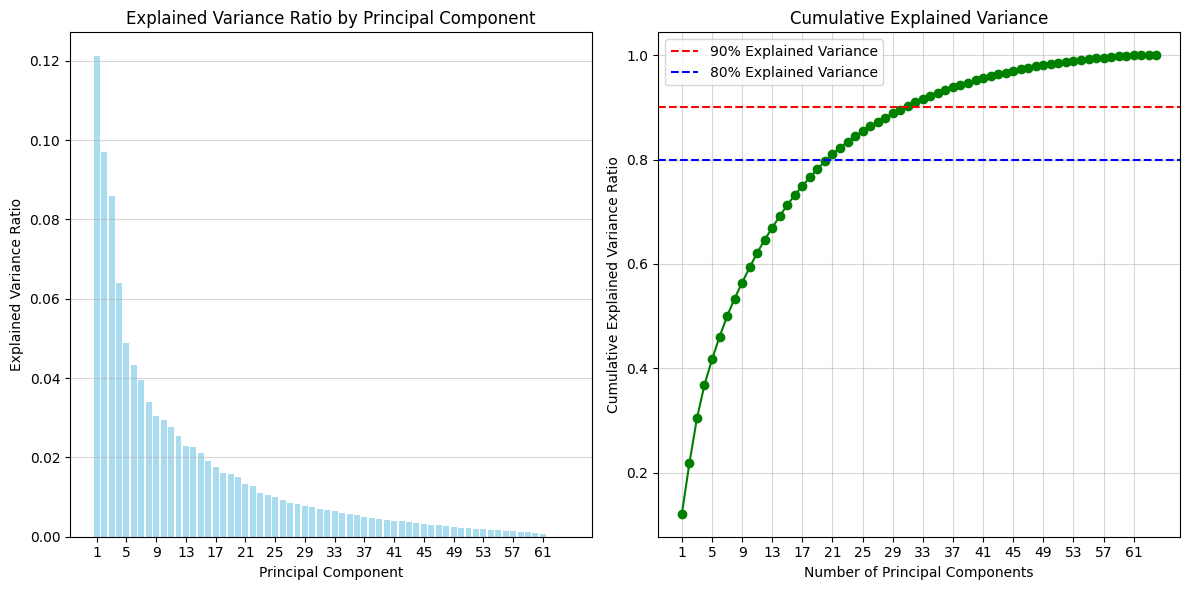

Explained variance ratio of the first 10 components:
PC1: 0.1211 (12.11%)
PC2: 0.0970 (9.70%)
PC3: 0.0860 (8.60%)
PC4: 0.0640 (6.40%)
PC5: 0.0488 (4.88%)
PC6: 0.0433 (4.33%)
PC7: 0.0395 (3.95%)
PC8: 0.0340 (3.40%)
PC9: 0.0303 (3.03%)
PC10: 0.0294 (2.94%)

Number of components needed to explain 90% of variance: 31

Number of components needed to explain 80% of variance: 21


In [254]:
import matplotlib.pyplot as plt

total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

sorted_explained_variance_ratio = np.sort(explained_variance_ratio)[::-1]

cumulative_explained_variance = np.cumsum(sorted_explained_variance_ratio)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, 65), sorted_explained_variance_ratio, alpha=0.7, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(np.arange(1, 65, 4))
plt.grid(axis='y', alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(range(1, 65), cumulative_explained_variance, 'o-', color='green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.xticks(np.arange(1, 65, 4))
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.8, color='b', linestyle='--', label='80% Explained Variance')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

print("Explained variance ratio of the first 10 components:")
for i, var in enumerate(sorted_explained_variance_ratio[:10], 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

components_for_90_percent = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"\nNumber of components needed to explain 90% of variance: {components_for_90_percent}")

components_for_80_percent = np.argmax(cumulative_explained_variance >= 0.8) + 1
print(f"\nNumber of components needed to explain 80% of variance: {components_for_80_percent}")

Step 7: Make a list of (eigenvalue, eigenvector) tuples and sort the (eigenvalue, eigenvector) tuples from high to low based on the values of eigenvalues.

In [255]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

print("Top 5 eigenvalues after sorting:")
for i, (eigenvalue, _) in enumerate(eigen_pairs[:5], 1):
    print(f"Principal Component {i}: {eigenvalue:.6f}")

Top 5 eigenvalues after sorting:
Principal Component 1: 7.394739
Principal Component 2: 5.922319
Principal Component 3: 5.252293
Principal Component 4: 3.907468
Principal Component 5: 2.976146


Step 8: Select the 2 eigenvectors, which correspond to the 2 largest eigenvalues. Construct a projection matrix,  $\mathbf{W}$ , from the “top”  2 eigenvectors.

In [256]:
top_2_eigenvectors = np.array([eigen_pairs[0][1], eigen_pairs[1][1]])

W = top_2_eigenvectors.T

print(f"Projection matrix W shape: {W.shape}")

Projection matrix W shape: (64, 2)


Step 9: Transform the  64-dimensional input digit images using the projection matrix, $\mathbf{W}$, to obtain the new  2-dimensional feature subspace of the images.

In [257]:
X_train_pca = X_train_std.dot(W)
X_test_pca = X_test_std.dot(W)

print(f"Original X_train_std shape: {X_train_std.shape}")
print(f"Transformed X_train_pca shape: {X_train_pca.shape}")

print(f"\nOriginal X_test_std shape: {X_test_std.shape}")
print(f"Transformed X_test_pca shape: {X_test_pca.shape}")

Original X_train_std shape: (1347, 64)
Transformed X_train_pca shape: (1347, 2)

Original X_test_std shape: (450, 64)
Transformed X_test_pca shape: (450, 2)


Step 10: Plot the image data points with only 2 features on a 2-D plane. Color the points with different colors based on its digit labels. **Do the 2 largest principles help you visualize the image clusters?**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25128\2814807222.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 10)


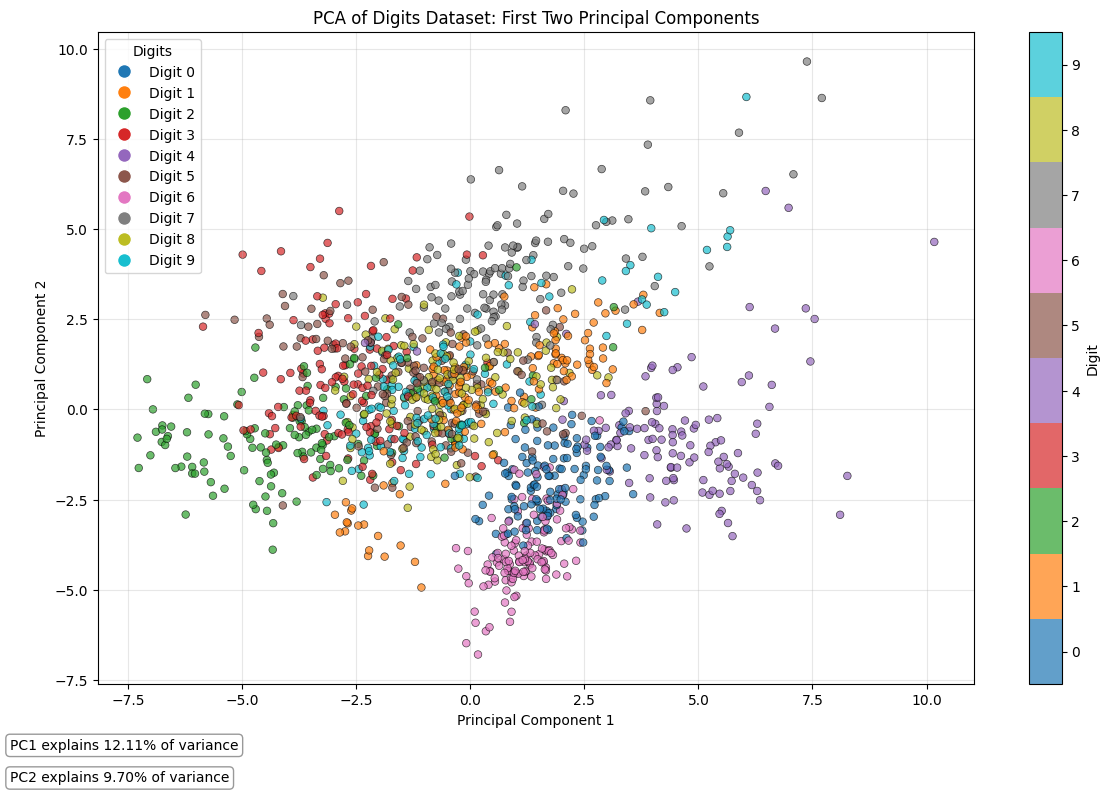

In [258]:
plt.figure(figsize=(12,8))
cmap = plt.cm.get_cmap('tab10', 10) 

scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                      c=y_train, cmap=cmap,
                      s=30, alpha=0.7, edgecolors='k', linewidths=0.5)

bounds   = np.arange(-0.5, 10.5, 1)
cbar = plt.colorbar(
    scatter,
    boundaries=bounds,
    ticks=np.arange(10)
)
cbar.set_label('Digit')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits Dataset: First Two Principal Components')
plt.grid(True, alpha=0.3)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=cmap(i), markersize=10, 
                             label=f'Digit {i}') 
                  for i in range(10)]

plt.legend(handles=legend_elements, loc='best', title='Digits')
ev1, ev2 = sorted_explained_variance_ratio[0], sorted_explained_variance_ratio[1]
plt.annotate(f'PC1 explains {ev1:.2%} of variance',
            xy=(-0.1, -0.1), xycoords='axes fraction',
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.8))

plt.annotate(f'PC2 explains {ev2:.2%} of variance',
            xy=(-0.1, -0.15), xycoords='axes fraction',
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.8))

plt.tight_layout()
plt.show()

It's partially useful, but far from enough. The points do form clusters, but they have no clear boundaries and overlap each other, which means 2-dim can't contain enough information

Step 11: At this step, you will evaluate a default logistic regression classifier on 3 different data sets, the 64-dimensional original images data, the reduced 2-dimensional images data, and the $k$-dimensional images data, where $k$ is the number of principle components which account for 80% of the explained variance ratio.
- Evaluate the accuracy of classifying the original 64-dimensional images data.
- Evaluate the accuracy of classifying the reduced 2-dimensional images data.
- Evaluate the accuracy of classifying the $k$-dimensional images data, where $k$ is the number of principle components which account for 80% of the explained variance ratio.

**Discuss and explain the results and insights.**

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

k = np.argmax(cumulative_explained_variance >= 0.8) + 1
print(f"Number of components needed for 80% explained variance: {k}")

top_k_eigenvectors = np.array([eigen_pairs[i][1] for i in range(k)])
W_k = top_k_eigenvectors.T

X_train_pca_k = X_train_std.dot(W_k)
X_test_pca_k = X_test_std.dot(W_k)

print(f"Original data: {X_train_std.shape[1]} dimensions")
print(f"PCA data (2 dimensions): 2 dimensions")
print(f"PCA data (k dimensions): {k} dimensions")

Number of components needed for 80% explained variance: 21
Original data: 64 dimensions
PCA data (2 dimensions): 2 dimensions
PCA data (k dimensions): 21 dimensions


In [260]:
# 64-dimensional data
lr_original = LogisticRegression(random_state=42, max_iter=1000)
lr_original.fit(X_train_std, y_train)
y_pred_original = lr_original.predict(X_test_std)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.95      0.95      0.95        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.93      0.97      0.95        38
           9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [261]:
# 2-dimensional data
lr_pca_2 = LogisticRegression(random_state=42, max_iter=1000)
lr_pca_2.fit(X_train_pca, y_train)
y_pred_pca_2 = lr_pca_2.predict(X_test_pca)
accuracy_pca_2 = accuracy_score(y_test, y_pred_pca_2)
print(classification_report(y_test, y_pred_pca_2))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        43
           1       0.27      0.51      0.35        37
           2       0.48      0.76      0.59        38
           3       0.38      0.39      0.38        46
           4       0.92      0.85      0.89        55
           5       0.28      0.12      0.17        59
           6       0.80      0.89      0.84        45
           7       0.58      0.78      0.67        41
           8       0.19      0.16      0.17        38
           9       0.13      0.04      0.06        48

    accuracy                           0.51       450
   macro avg       0.47      0.52      0.48       450
weighted avg       0.48      0.51      0.48       450



In [262]:
# k-dimensional data
lr_pca_k = LogisticRegression(random_state=42, max_iter=1000)
lr_pca_k.fit(X_train_pca_k, y_train)
y_pred_pca_k = lr_pca_k.predict(X_test_pca_k)
accuracy_pca_k = accuracy_score(y_test, y_pred_pca_k)
print(classification_report(y_test, y_pred_pca_k))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.94      0.86      0.90        37
           2       0.88      0.97      0.93        38
           3       0.93      0.89      0.91        46
           4       0.95      0.96      0.95        55
           5       0.95      0.92      0.93        59
           6       0.96      0.98      0.97        45
           7       1.00      0.98      0.99        41
           8       0.86      0.97      0.91        38
           9       0.89      0.85      0.87        48

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450




Accuracy scores:
Original 64-dimensional data: 0.9711
PCA with 2 dimensions: 0.5067
PCA with 21 dimensions (80% variance): 0.9356


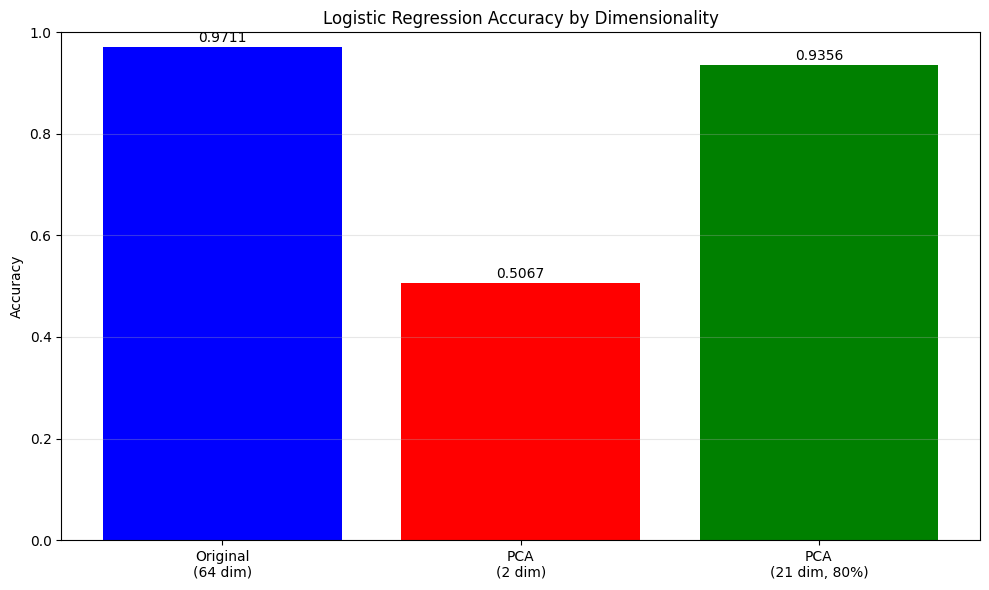

In [263]:
# evaluation
print("\nAccuracy scores:")
print(f"Original 64-dimensional data: {accuracy_original:.4f}")
print(f"PCA with 2 dimensions: {accuracy_pca_2:.4f}")
print(f"PCA with {k} dimensions (80% variance): {accuracy_pca_k:.4f}")

plt.figure(figsize=(10, 6))
accuracies = [accuracy_original, accuracy_pca_2, accuracy_pca_k]
labels = [f'Original\n(64 dim)', f'PCA\n(2 dim)', f'PCA\n({k} dim, 80%)']
plt.bar(labels, accuracies, color=['blue', 'red', 'green'])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by Dimensionality')
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')

plt.tight_layout()
plt.show()

 - Results analysis
    - Original 64-dimensional data (97.11% accuracy):
        - The classifier performs extremely well with all 64 pixels as features
        - This sets our baseline for maximum performance
    - PCA with 2 dimensions (50.67% accuracy):
        - The accuracy drops dramatically when using only 2 principal components
        - This is much worse than expected
        - While 2 dimensions might be useful for visualization, they clearly lose critical information needed to distinguish between digits
    - PCA with 21 dimensions (80% variance) (93.56% accuracy):
        - Using 21 components recovers most of the predictive power
        - We've reduced dimensionality by 67% (from 64 to 21) while sacrificing only about 3.55% in accuracy
- Key insight
    - We can compress the data from 64 to 21 dimensions while preserving most of the classification performance. This demonstrates significant redundancy in the original pixel space
    - The 21-dimensional representation offers an excellent balance between computational efficiency and accuracy, reducing the feature space by two-thirds with minimal performance impact
    - This demonstrates why PCA is valuable in machine learning pipelines. It can significantly reduce computational requirements while maintaining strong performance on the task at hand.

# Question 2: Use scikit-learn Pipeline and Grid Search
In this question, you will practice with the Pipeline and GridSearchCV classes in scikit-learn for model selection.

You will compare the scikit-learn Logistic Regression and Random Forest models using various hyperparameters for classifying the wines in the scikit-learn wine dataset.  At the end, you will choose the best model for the classification task.

Step 1: Load the wine data set from scikit-learn datasets using `load_wine()`. Load the data as a Pandas DataFrame `df`. Show the head of the DataFrame. List the feature names. How many classes are in the target?

In [264]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
df.columns = list(wine.feature_names) + ['target']
df['target'] = df['target'].map(dict(zip(range(3), wine.target_names)))

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nFeature names:")
print(wine.feature_names)

print("\nNumber of classes in the target:", len(wine.target_names))
print("Class names:", wine.target_names)

First 5 rows of the DataFrame:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines

Step 2: Import the necessary libraries from scikit-learn. Split the data into train and test sets.

In [265]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))

Training set shape: X_train: (124, 13), y_train: (124,)
Test set shape: X_test: (54, 13), y_test: (54,)

Class distribution in training set:
target
class_1    0.403226
class_0    0.330645
class_2    0.266129
Name: proportion, dtype: float64

Class distribution in test set:
target
class_1    0.388889
class_0    0.333333
class_2    0.277778
Name: proportion, dtype: float64


Step 3: Make a pipeline with StandardScaler and LogisticRegression model. Also, make a pipeline with StandardScaler and RandomForestClassifier model.

In [266]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

print("Logistic Regression Pipeline:")
print(pipe_lr)
print("\nRandom Forest Pipeline:")
print(pipe_rf)

Logistic Regression Pipeline:
Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])

Random Forest Pipeline:
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])


Step 4: Create a parameter grid for the logistic regression model. You should vary the `C` and `solver` parameters.

In [267]:
param_grid_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']
}

Step 5: Create a parameter grid for the random forest model. You shoudl vary the `n_estimators` and `max_depth` parameters.

In [268]:
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200, 300],
    'rf__max_depth': [None, 5, 10, 15, 20]
}

Step 6: Create a GridSearchCV object with the logistic regression pipeline, its parameter grid, and 5-fold cross validation. Fit the GridSearchCV object to find the best logistic regression model.

In [269]:
grid_search_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("Performing grid search for Logistic Regression...")
grid_search_lr.fit(X_train, y_train)

print("\nBest parameters for Logistic Regression:")
print(grid_search_lr.best_params_)
print(f"\nBest cross-validation score (accuracy): {grid_search_lr.best_score_:.4f}")

best_lr_model = grid_search_lr.best_estimator_

y_pred_lr = best_lr_model.predict(X_test)
print(f"\nTest set accuracy with best Logistic Regression model: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report for best Logistic Regression model:")
print(classification_report(y_test, y_pred_lr))

Performing grid search for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters for Logistic Regression:
{'lr__C': 1, 'lr__solver': 'lbfgs'}

Best cross-validation score (accuracy): 0.9837

Test set accuracy with best Logistic Regression model: 0.9815

Classification Report for best Logistic Regression model:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Step 7: Create a GridSearchCV object with the random forest pipeline, its parameter grid, and 5-fold cross validation. Fit the GridSearchCV object to find the best random forest model.

In [270]:
grid_search_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("Performing grid search for Random Forest...")
grid_search_rf.fit(X_train, y_train)

print("\nBest parameters for Random Forest:")
print(grid_search_rf.best_params_)
print(f"\nBest cross-validation score (accuracy): {grid_search_rf.best_score_:.4f}")

best_rf_model = grid_search_rf.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
print(f"\nTest set accuracy with best Random Forest model: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report for best Random Forest model:")
print(classification_report(y_test, y_pred_rf))

Performing grid search for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters for Random Forest:
{'rf__max_depth': None, 'rf__n_estimators': 200}

Best cross-validation score (accuracy): 0.9753

Test set accuracy with best Random Forest model: 1.0000

Classification Report for best Random Forest model:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Step 8: Print out the best logistic regression and random forest model.

In [271]:
# Print best Logistic Regression model details
print("BEST LOGISTIC REGRESSION MODEL")
print("-" * 50)
print("Pipeline steps:")
for name, step in best_lr_model.named_steps.items():
    print(f"- {name}: {step}")
    
print("\nBest parameters:", grid_search_lr.best_params_)
print("Best cross-validation accuracy:", round(grid_search_lr.best_score_, 4))

print("\nBEST RANDOM FOREST MODEL")
print("-" * 50)
print("Pipeline steps:")
for name, step in best_rf_model.named_steps.items():
    print(f"- {name}: {step}")
    
print("\nBest parameters:", grid_search_rf.best_params_)
print("Best cross-validation accuracy:", round(grid_search_rf.best_score_, 4))

BEST LOGISTIC REGRESSION MODEL
--------------------------------------------------
Pipeline steps:
- scaler: StandardScaler()
- lr: LogisticRegression(C=1, random_state=42)

Best parameters: {'lr__C': 1, 'lr__solver': 'lbfgs'}
Best cross-validation accuracy: 0.9837

BEST RANDOM FOREST MODEL
--------------------------------------------------
Pipeline steps:
- scaler: StandardScaler()
- rf: RandomForestClassifier(n_estimators=200, random_state=42)

Best parameters: {'rf__max_depth': None, 'rf__n_estimators': 200}
Best cross-validation accuracy: 0.9753


Step 9: Evaluate the best logistic regression and random forest models on the test data. Print out the classification accuracy. Which model should be selected for the classification task?

In [272]:
y_pred_lr = best_lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr)
lr_confusion = confusion_matrix(y_test, y_pred_lr)

y_pred_rf = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_confusion = confusion_matrix(y_test, y_pred_rf)

print("BEST MODEL")
print("=" * 50)

print("Logistic Regression Model:")
print("-" * 50)
print(f"Accuracy: {lr_accuracy:.4f}")
print("Classification Report:")
print(lr_report)
print("Confusion Matrix:")
print(lr_confusion)

print("\nRandom Forest Model:")
print("-" * 50)
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(rf_report)
print("Confusion Matrix:")
print(rf_confusion)

print("\nMODEL SELECTION")
print("=" * 50)

print(f"Logistic Regression CV Accuracy: {grid_search_lr.best_score_:.4f}")
print(f"Random Forest CV Accuracy: {grid_search_rf.best_score_:.4f}")
print(f"Difference in CV Accuracy: {abs(grid_search_lr.best_score_ - grid_search_rf.best_score_):.4f}")

print(f"\nLogistic Regression Test Accuracy: {lr_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"Difference in Test Accuracy: {abs(lr_accuracy - rf_accuracy):.4f}")

if rf_accuracy > lr_accuracy:
    print("\nRecommendation: Select the Random Forest model")
    print(f"Random Forest outperforms Logistic Regression by {(rf_accuracy - lr_accuracy):.4f} on the test set")
    print(f"Best Random Forest parameters: {grid_search_rf.best_params_}")
elif lr_accuracy > rf_accuracy:
    print("\nRecommendation: Select the Logistic Regression model")
    print(f"Logistic Regression outperforms Random Forest by {(lr_accuracy - rf_accuracy):.4f} on the test set")
    print(f"Best Logistic Regression parameters: {grid_search_lr.best_params_}")
else:
    print("\nBoth models perform equally well on the test set")

BEST MODEL
Logistic Regression Model:
--------------------------------------------------
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix:
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Random Forest Model:
--------------------------------------------------
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00       